In [28]:
# Familiar imports
import numpy as np
import pandas as pd

from sklearn import model_selection
# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# For training model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
import lightgbm as lgb


#for analysis
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


import warnings
warnings.simplefilter("ignore")

In [30]:
# Load the training data
train = pd.read_csv("30-days-of-ml/train.csv")

# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [31]:
train.shape

(300000, 26)

In [32]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


(array([5.00000e+00, 7.00000e+00, 1.80000e+01, 5.80000e+01, 1.22000e+02,
        2.66000e+02, 3.86230e+04, 1.31719e+05, 1.11450e+05, 1.77320e+04]),
 array([ 0.14032877,  1.16749507,  2.19466137,  3.22182767,  4.24899396,
         5.27616026,  6.30332656,  7.33049286,  8.35765916,  9.38482545,
        10.41199175]),
 <BarContainer object of 10 artists>)

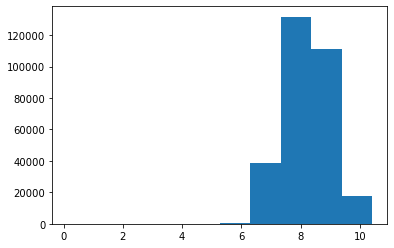

In [33]:
plt.hist(train.target)

We need to see if the distribution is the same in every fold, that way we know the number of folds are correct

In [34]:
train['kfold']=-1

In [35]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)

In [36]:
for fold, (train_indexes, valid_indexes) in enumerate (kf.split(X=train)):
    #print(fold, train_indexes, valid_indexes)
    print(valid_indexes)
    train.loc[valid_indexes,'kfold']=fold

[     1      4      6 ... 299977 299978 299984]
[     3     18     22 ... 299990 299991 299992]
[     9     10     12 ... 299981 299982 299993]
[    23     25     33 ... 299994 299997 299999]
[     0      2      5 ... 299995 299996 299998]


In [38]:
train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,4
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,0
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,1
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,B,B,A,A,B,D,A,E,A,...,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605,4
299996,499996,A,B,A,C,B,B,A,E,E,...,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118,4
299997,499997,B,B,A,C,B,C,A,E,G,...,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755,3
299998,499998,A,B,A,C,B,B,A,E,E,...,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030,7.229569,4


In [39]:
train.kfold.value_counts()

0    60000
1    60000
2    60000
3    60000
4    60000
Name: kfold, dtype: int64

This is to check the distribution

<AxesSubplot:>

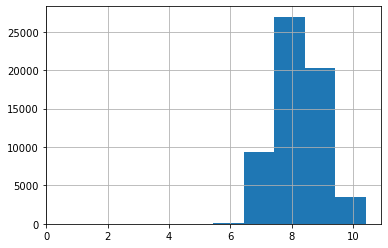

In [40]:
train[train.kfold==0].target.hist()

<AxesSubplot:>

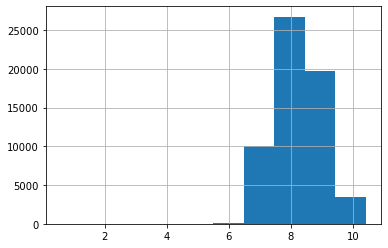

In [41]:
train[train.kfold==1].target.hist()

<AxesSubplot:>

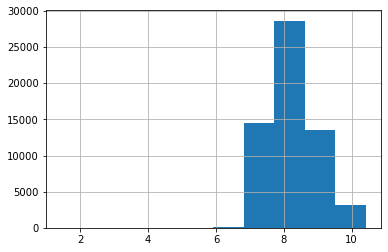

In [42]:
train[train.kfold==2].target.hist()

<AxesSubplot:>

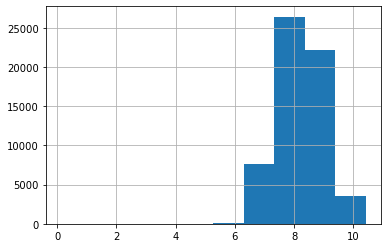

In [43]:
train[train.kfold==3].target.hist()

<AxesSubplot:>

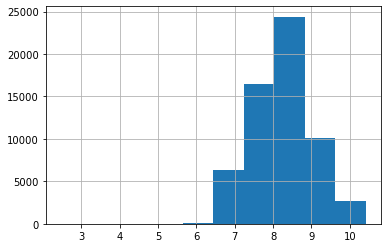

In [44]:
train[train.kfold==4].target.hist()

In [46]:
train.to_csv('30-days-of-ml/train_folds.csv', index=False)